In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = {'Country': [ 'B', 'C', 'D', 'E', 'F', 'G', 'H'], 
        'Output, Q':[ 80, 150, 135, 165, 95, 130, 110], 
        'Labour, L':[ 60, 100, 100, 120, 70, 90, 80],
        'Capital, K':[ 50, 100, 80, 100, 60, 80, 70]}
economy = pd.DataFrame(data, columns=['Country','Output, Q','Labour, L', 'Capital, K'])
economy.set_index('Country', inplace=True)
given_economy = pd.DataFrame.transpose(economy)
print(economy)
print(given_economy)
                                                                                            

         Output, Q  Labour, L  Capital, K
Country                                  
B               80         60          50
C              150        100         100
D              135        100          80
E              165        120         100
F               95         70          60
G              130         90          80
H              110         80          70
Country      B    C    D    E   F    G    H
Output, Q   80  150  135  165  95  130  110
Labour, L   60  100  100  120  70   90   80
Capital, K  50  100   80  100  60   80   70


In [40]:
#Find mean of Q, L and K
print ('Mean of Q, L and K')
economy.mean()

Mean of Q, L and K


Output, Q     123.571429
Labour, L      88.571429
Capital, K     77.142857
dtype: float64

In [41]:
#Find variance of Q, L and K
print ('Variance of Q, L and K')
economy.var()

Variance of Q, L and K


Output, Q     914.285714
Labour, L     414.285714
Capital, K    357.142857
dtype: float64

In [42]:
#Find standard deviation of Q, L and K
print ('Standard deviation of Q, L and K')
economy.std()

Standard deviation of Q, L and K


Output, Q     30.237158
Labour, L     20.354010
Capital, K    18.898224
dtype: float64

In [43]:
#Find median of Q, L and K
print('Median of Q, L and K')
economy.median()

Median of Q, L and K


Output, Q     130.0
Labour, L      90.0
Capital, K     80.0
dtype: float64

Country
B     80
C    150
D    135
E    165
F     95
G    130
H    110
Name: Output, Q, dtype: int64


(array([2., 1., 2., 2.]),
 array([ 80.  , 101.25, 122.5 , 143.75, 165.  ]),
 <a list of 4 Patch objects>)

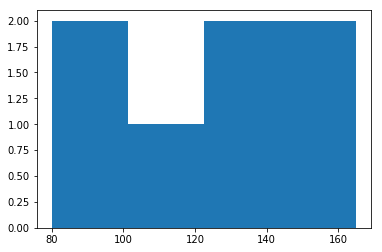

In [54]:
print(economy['Output, Q'])
economy_output = economy['Output, Q']
plt.hist(economy['Output, Q'],bins="auto") #Plot the histogram of Output

Country
B     60
C    100
D    100
E    120
F     70
G     90
H     80
Name: Labour, L, dtype: int64


(array([2., 1., 3., 1.]),
 array([ 60.,  75.,  90., 105., 120.]),
 <a list of 4 Patch objects>)

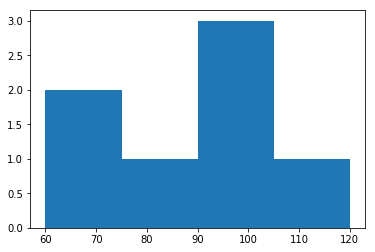

In [53]:
print(economy['Labour, L'])
plt.hist(economy['Labour, L'], bins='auto') #plot histogram for Labour 

In [57]:
tval = np.log(economy)
print(tval)

         Output, Q  Labour, L  Capital, K
Country                                  
B         4.382027   4.094345    3.912023
C         5.010635   4.605170    4.605170
D         4.905275   4.605170    4.382027
E         5.105945   4.787492    4.605170
F         4.553877   4.248495    4.094345
G         4.867534   4.499810    4.382027
H         4.700480   4.382027    4.248495


In [95]:
from sklearn import linear_model 
X = tval[['Labour, L','Capital, K']]
Y = tval['Output, Q']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
regr.predict(X)
print(regr.predict(X))

print('Coeffcients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

[4.38189049 5.01467364 4.90115138 5.11466379 4.55918539 4.84336878
 4.71084044]
Coeffcients:  [0.54842747 0.50874094]
Intercept:  0.14623321175616688


In [67]:
#fitting with statsmodel
import statsmodels.api as sm
X = tval[['Labour, L','Capital, K']]
Y = tval['Output, Q']

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()


print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Output, Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        21:48:00   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1462      0.114      1.282      0.2

C:\Users\Tuan\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


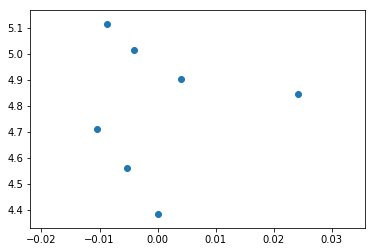

In [98]:
Y_hat = regr.predict(X)
residuals = Y - Y_hat 
plt.scatter(residuals, Y_hat)

In [111]:
R_squared = regr.score(X,Y)
Sample_size = 7
Predictors = 2 
Adj_R2 = 1 - (1-R_squared)*(Sample_size-1)/(Sample_size - Predictors - 1)
print(Adj_R2)

0.9968763418198051
